In [1]:
# Importing required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data

df = pd.read_excel('php6pI1Nq.xlsx')

In [3]:
# Top 5 rows of the data

df.head()

,datetime,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dayOfWeek
0,'2011-01-01 00:00:00','00:00:00','1','0','0','1',9.84,14.395,81,0.0,16,'zaterdag'
1,'2011-01-01 01:00:00','01:00:00','1','0','0','1',9.02,13.635,80,0.0,40,'zaterdag'
2,'2011-01-01 02:00:00','02:00:00','1','0','0','1',9.02,13.635,80,0.0,32,'zaterdag'
3,'2011-01-01 03:00:00','03:00:00','1','0','0','1',9.84,14.395,75,0.0,13,'zaterdag'
4,'2011-01-01 04:00:00','04:00:00','1','0','0','1',9.84,14.395,75,0.0,1,'zaterdag'


In [4]:
# Dimension check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   time        10886 non-null  object 
 2   season      10886 non-null  object 
 3   holiday     10886 non-null  object 
 4   workingday  10886 non-null  object 
 5   weather     10886 non-null  object 
 6   temp        10886 non-null  float64
 7   atemp       10886 non-null  float64
 8   humidity    10886 non-null  int64  
 9   windspeed   10886 non-null  float64
 10  count       10886 non-null  int64  
 11  dayOfWeek   10886 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1020.7+ KB


In [5]:
# Removing time information from datetime column

df['datetime'] = df['datetime'].apply(lambda x : x.split(' ')[0])
df['datetime']

0        '2011-01-01
1        '2011-01-01
2        '2011-01-01
3        '2011-01-01
4        '2011-01-01
            ...     
10881    '2012-12-19
10882    '2012-12-19
10883    '2012-12-19
10884    '2012-12-19
10885    '2012-12-19
Name: datetime, Length: 10886, dtype: object

In [6]:
# Check type of 'datetime' column

type(df['datetime'])

pandas.core.series.Series

In [7]:
# Converting 'datetime' column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.head(2)

,datetime,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dayOfWeek
0,2011-01-01,'00:00:00','1','0','0','1',9.84,14.395,81,0.0,16,'zaterdag'
1,2011-01-01,'01:00:00','1','0','0','1',9.02,13.635,80,0.0,40,'zaterdag'


In [9]:
type(df['datetime'])

pandas.core.series.Series

In [10]:
df2 = df[['datetime','time','count']]
df2.head()

,datetime,time,count
0,2011-01-01,'00:00:00',16
1,2011-01-01,'01:00:00',40
2,2011-01-01,'02:00:00',32
3,2011-01-01,'03:00:00',13
4,2011-01-01,'04:00:00',1


In [11]:
# "Dataset consists of observations recorded every hour. For easy model building , we groupby the data to every day by
# considering average rides per day"


df2 = df2.groupby(by = 'datetime' , axis=0).mean()

In [12]:
df2

,count
datetime,
2011-01-01,41.041667
2011-01-02,34.826087
2011-01-03,61.318182
2011-01-04,67.913043
2011-01-05,69.565217
...,...
2012-12-15,210.291667
2012-12-16,157.750000
2012-12-17,191.041667


In [13]:
# Resetting column name 
df2.columns = ['# of rides']

In [14]:
df2.head(2)

,# of rides
datetime,
2011-01-01,41.041667
2011-01-02,34.826087


# Trend analysis of number of rides every month

Text(0.5, 1.0, 'Trend analysis of number of rides for 456 days')

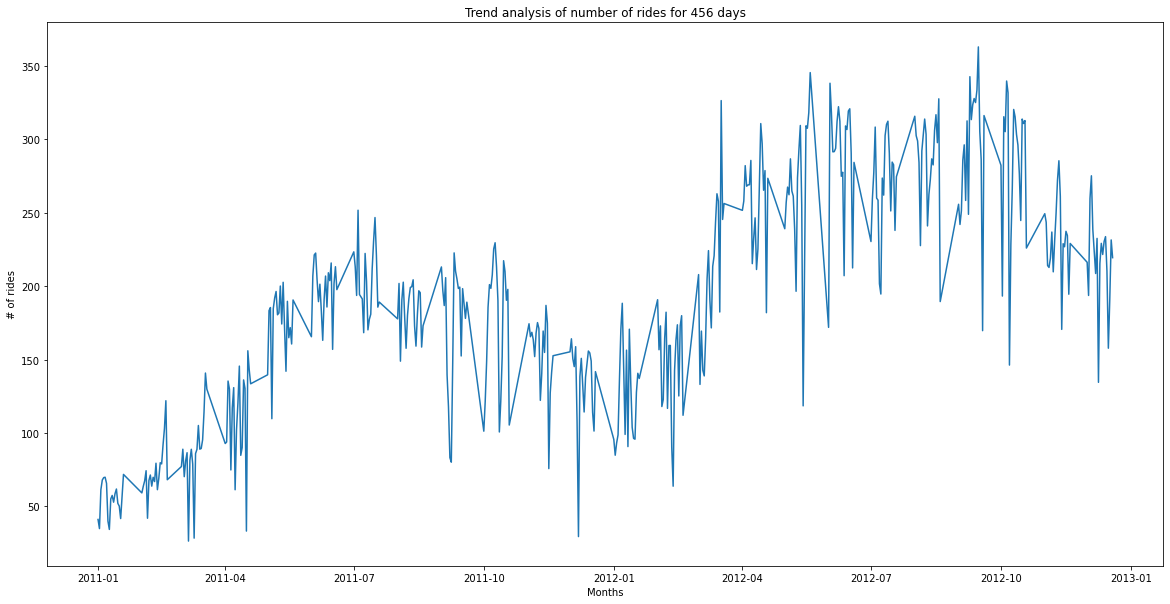

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df2['# of rides'])
plt.xlabel('Months')
plt.ylabel('# of rides')
plt.title('Trend analysis of number of rides for 456 days')

# Model 2 - Exponential smoothing

In [16]:
df2['exp_smooth_30'] = df2['# of rides'].ewm(alpha=0.2).mean()

In [17]:
456-30

426

In [18]:
pd.set_option('display.float_format' , lambda x:'%.2f' %x)
pd.set_option('display.max_rows' , 500)
df2[['# of rides' , 'exp_smooth_30']][426:]

,# of rides,exp_smooth_30
datetime,,
2012-11-09,249.67,237.46
2012-11-10,272.33,244.43
2012-11-11,285.50,252.65
2012-11-12,261.21,254.36
2012-11-13,170.58,237.60
2012-11-14,228.96,235.88
2012-11-15,226.88,234.08
2012-11-16,237.42,234.74
2012-11-17,234.54,234.70


Text(0.5, 1.0, 'Actual vs predicted values of number of rides for 30 days')

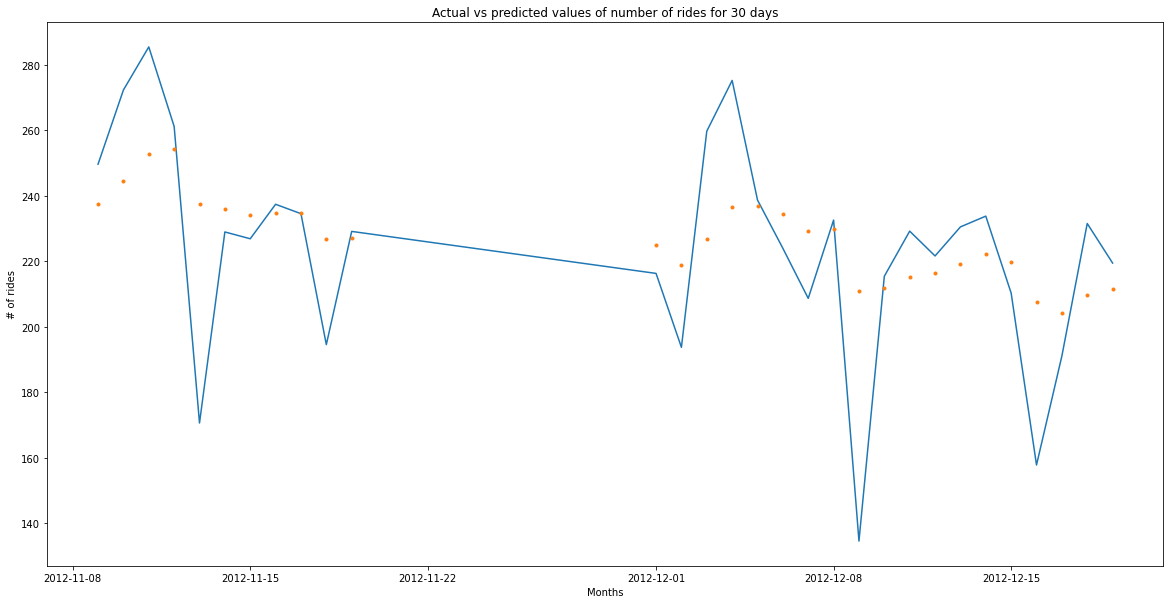

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df2['# of rides'][426:])
plt.plot(df2['exp_smooth_30'][426:], '.')
plt.xlabel('Months')
plt.ylabel('# of rides')
plt.title('Actual vs predicted values of number of rides for 30 days')

# --> Accuracy for exponential smoothing method 

In [20]:
def mape(actual,pred):
    y_true , p_pred = np.array(actual) , np.array(pred)
    print(f"MAPE for moving average = {np.round(np.mean(np.abs((actual-pred) / actual)) * 100 , 2)}") 

In [21]:
mape(df2['# of rides'][426:].values , df2['exp_smooth_30'][426:].values)

MAPE for moving average = 9.53


In [22]:
from sklearn import metrics

print(f"RMSE for moving average = {np.sqrt(metrics.mean_squared_error(df2['# of rides'][426:].values , df2['exp_smooth_30'][426:].values))}")

RMSE for moving average = 26.518408005412045
